In [21]:
import pandas as pd
df = pd.read_csv("cardinality_benchmark.tsv", sep="\t")
df = df[~df.bits.isin([1, 2 , 3])]
df

,precision,bits,exact,hll,hll_mle,hash_name
3,4,4,56260,56260.000,89665.830,siphasher::sip::SipHasher13
4,4,5,56260,56260.000,87682.870,siphasher::sip::SipHasher13
5,4,6,56260,56260.000,87682.870,siphasher::sip::SipHasher13
9,5,4,56260,56260.000,64008.700,siphasher::sip::SipHasher13
10,5,5,56260,56260.000,63910.350,siphasher::sip::SipHasher13
...,...,...,...,...,...,...
83992,16,5,20203,20270.064,20286.215,siphasher::sip::SipHasher13
83993,16,6,20203,20270.064,20286.215,siphasher::sip::SipHasher13
83997,17,4,20203,20247.346,20253.975,siphasher::sip::SipHasher13
83998,17,5,20203,20247.346,20253.975,siphasher::sip::SipHasher13


In [22]:
df["memory"] = 2**df.precision * df.bits
df["label"] = "HLL"

In [23]:
df["squared_error_hll"] = (df.exact - df.hll)**2
df["squared_error_hll_mle"] = (df.exact - df.hll_mle)**2
columns = ["squared_error_hll", "squared_error_hll_mle",]
data_hll = df.groupby(["precision", "bits", "memory", "hash_name"])[columns].agg(["mean", "std"])
data_hll = data_hll.reset_index()
data_hll

precision bits  memory                    hash_name squared_error_hll  \
                                                                    mean   
0          4    4      64  siphasher::sip::SipHasher13      1.072150e+08   
1          4    5      80  siphasher::sip::SipHasher13      9.933931e+07   
2          4    6      96  siphasher::sip::SipHasher13      9.933902e+07   
3          5    4     128  siphasher::sip::SipHasher13      5.083160e+07   
4          5    5     160  siphasher::sip::SipHasher13      4.923947e+07   
5          5    6     192  siphasher::sip::SipHasher13      4.923951e+07   
6          6    4     256  siphasher::sip::SipHasher13      2.139055e+07   
7          6    5     320  siphasher::sip::SipHasher13      2.108410e+07   
8          6    6     384  siphasher::sip::SipHasher13      2.108412e+07   
9          7    4     512  siphasher::sip::SipHasher13      1.228019e+07   
10         7    5     640  siphasher::sip::SipHasher13      1.221919e+07   
11         7    6     768  siphasher::sip::SipHasher13      1.221920e+07   
12         8    4    1024  siphasher::sip::SipHasher13      6.662630e+06   
13         8    5    1280  siphasher::sip::SipHasher13      6.651760e+06   
14         8    6    1536  siphasher::sip::SipHasher13      6.651756e+06   
15         9    4    2048  siphasher::sip::SipHasher13      3.367322e+06   
16         9    5    2560  siphasher::sip::SipHasher13      3.365059e+06   
17         9    6    3072  siphasher::sip::SipHasher13      3.365059e+06   
18        10    4    4096  siphasher::sip::SipHasher13      1.789574e+06   
19        10    5    5120  siphasher::sip::SipHasher13      1.789129e+06   
20        10    6    6144  siphasher::sip::SipHasher13      1.789129e+06   
21        11    4    8192  siphasher::sip::SipHasher13      9.713107e+05   
22        11    5   10240  siphasher::sip::SipHasher13      9.712356e+05   
23        11    6   12288  siphasher::sip::SipHasher13      9.712356e+05   
24        12    4   16384  siphasher::sip::SipHasher13      4.962819e+05   
25        12    5   20480  siphasher::sip::SipHasher13      4.962661e+05   
26        12    6   24576  siphasher::sip::SipHasher13      4.962661e+05   
27        13    4   32768  siphasher::sip::SipHasher13      2.274560e+05   
28        13    5   40960  siphasher::sip::SipHasher13      2.274537e+05   
29        13    6   49152  siphasher::sip::SipHasher13      2.274537e+05   
30        14    4   65536  siphasher::sip::SipHasher13      9.861148e+04   
31        14    5   81920  siphasher::sip::SipHasher13      9.861114e+04   
32        14    6   98304  siphasher::sip::SipHasher13      9.861109e+04   
33        15    4  131072  siphasher::sip::SipHasher13      2.339851e+04   
34        15    5  163840  siphasher::sip::SipHasher13      2.339848e+04   
35        15    6  196608  siphasher::sip::SipHasher13      2.339846e+04   
36        16    4  262144  siphasher::sip::SipHasher13      1.287047e+04   
37        16    5  327680  siphasher::sip::SipHasher13      1.287049e+04   
38        16    6  393216  siphasher::sip::SipHasher13      1.287041e+04   
39        17    4  524288  siphasher::sip::SipHasher13      1.546773e+04   
40        17    5  655360  siphasher::sip::SipHasher13      1.546773e+04   
41        17    6  786432  siphasher::sip::SipHasher13      1.546773e+04   

                 squared_error_hll_mle                
             std                  mean           std  
0   2.450926e+08          2.487652e+08  6.724863e+08  
1   2.337909e+08          2.460526e+08  6.608083e+08  
2   2.337907e+08          2.460526e+08  6.608083e+08  
3   1.243626e+08          1.323031e+08  3.621938e+08  
4   1.216314e+08          1.325361e+08  3.670677e+08  
5   1.216312e+08          1.325361e+08  3.670677e+08  
6   5.244680e+07          5.836473e+07  1.325662e+08  
7   5.186427e+07          5.838219e+07  1.322972e+08  
8   5.186430e+07          5.838219e+07  1.322972e+08  
9   3.032054e+07          2.845620e+07  6.921712e+07 

In [24]:
(data_hll.squared_error_hll_mle["mean"] / data_hll.squared_error_hll["mean"])

0     2.320245
1     2.476891
2     2.476898
3     2.602773
4     2.691664
5     2.691662
6     2.728530
7     2.769015
8     2.769012
9     2.317244
10    2.329592
11    2.329591
12    2.129052
13    2.132662
14    2.132664
15    1.949757
16    1.951016
17    1.951016
18    1.956853
19    1.957309
20    1.957309
21    1.903294
22    1.903440
23    1.903440
24    1.834390
25    1.834449
26    1.834449
27    1.912446
28    1.912467
29    1.912467
30    1.944444
31    1.944451
32    1.944452
33    3.086137
34    3.086145
35    3.086148
36    2.482304
37    2.482300
38    2.482316
39    0.919326
40    0.919327
41    0.919327
Name: mean, dtype: float64

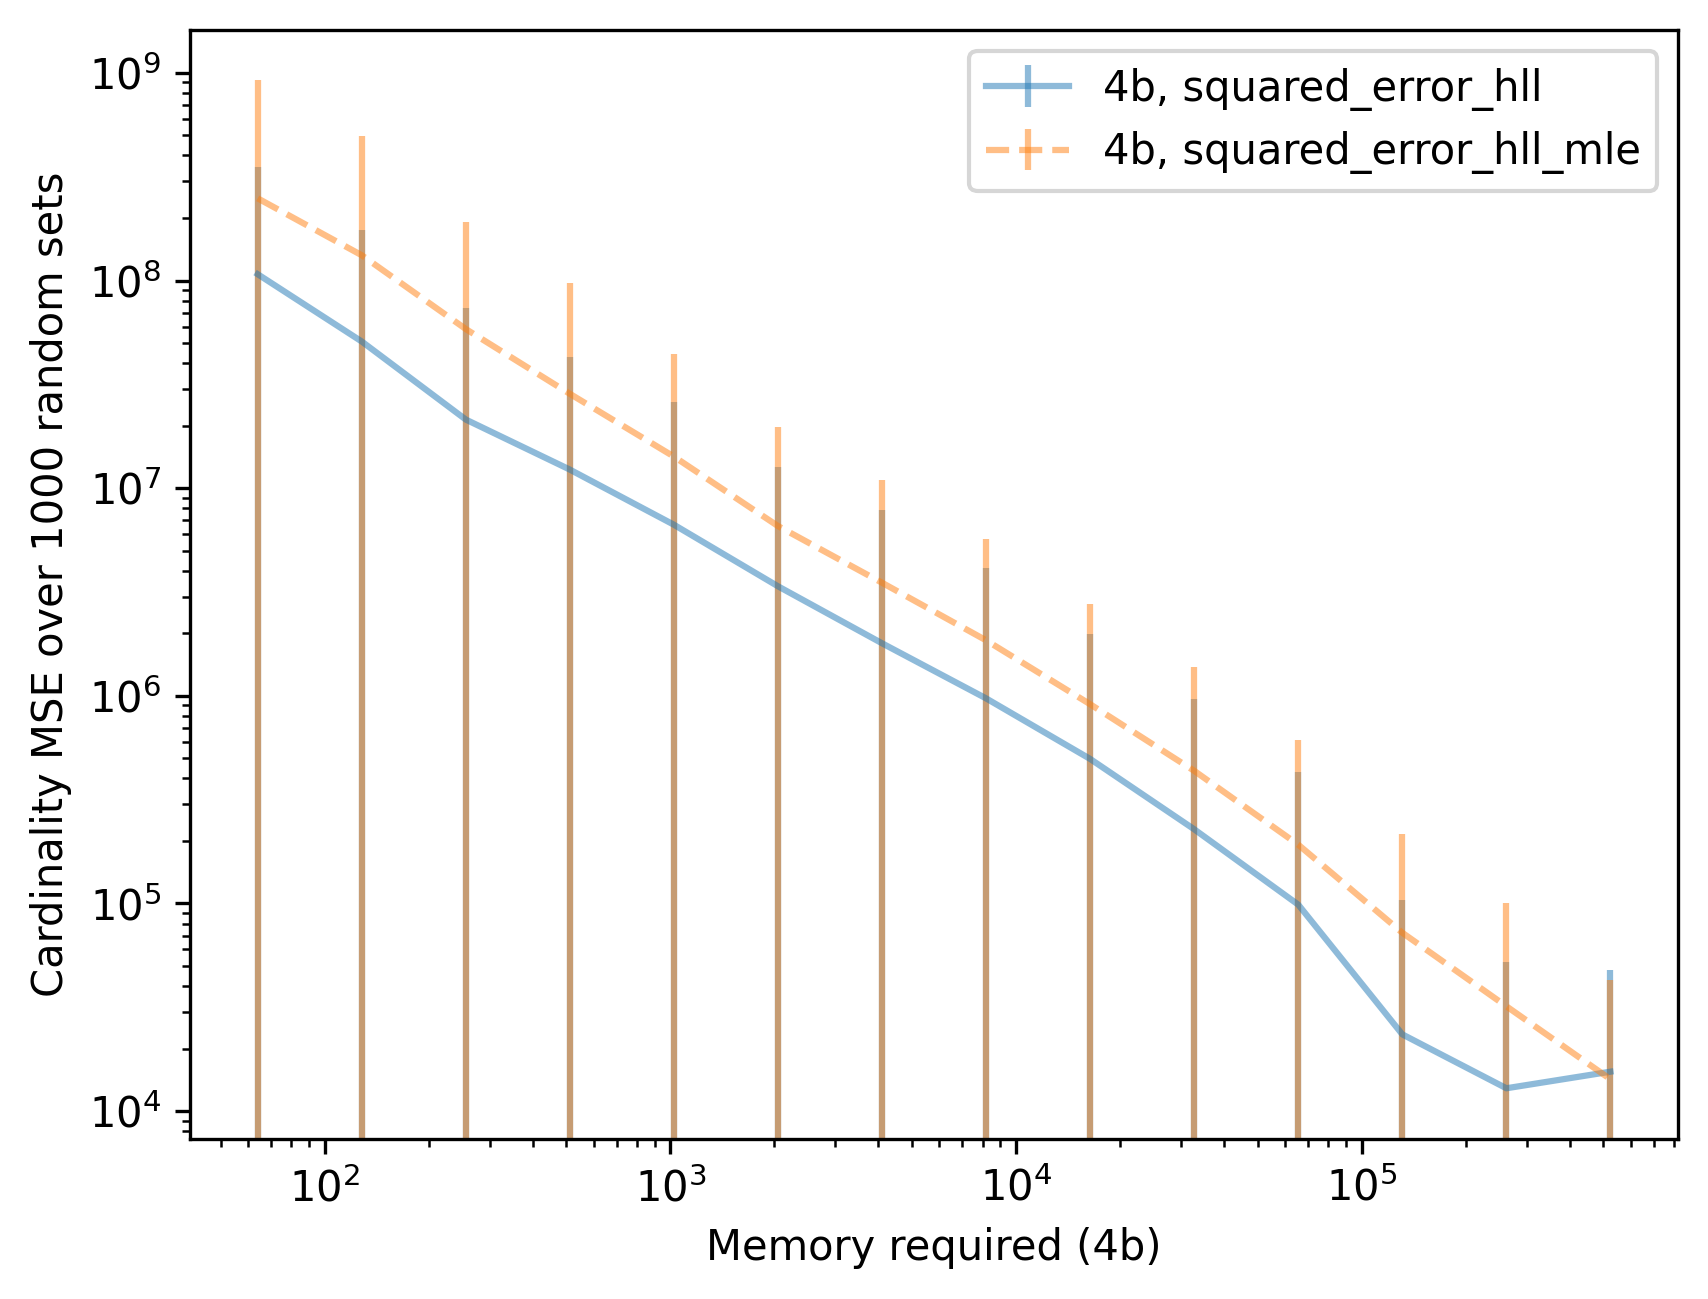

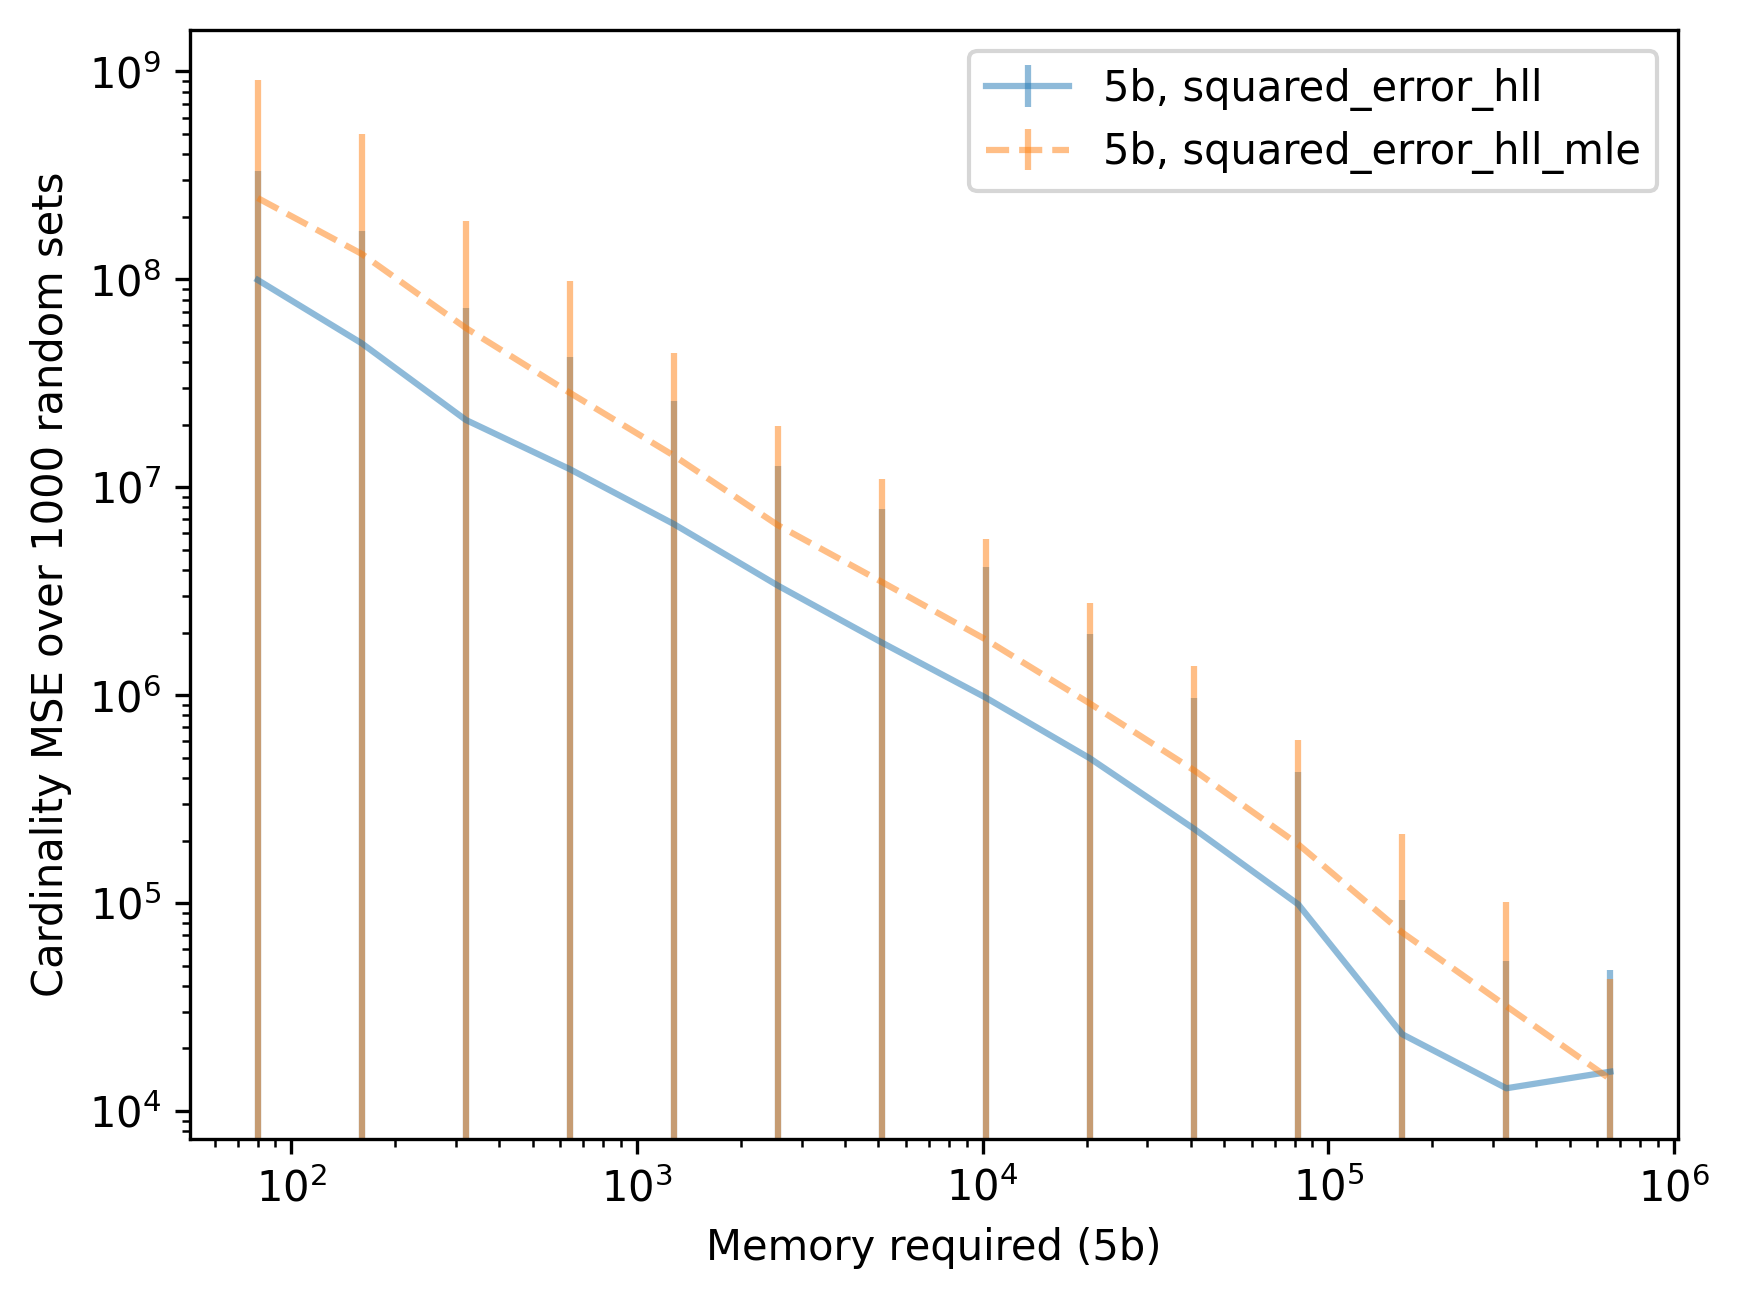

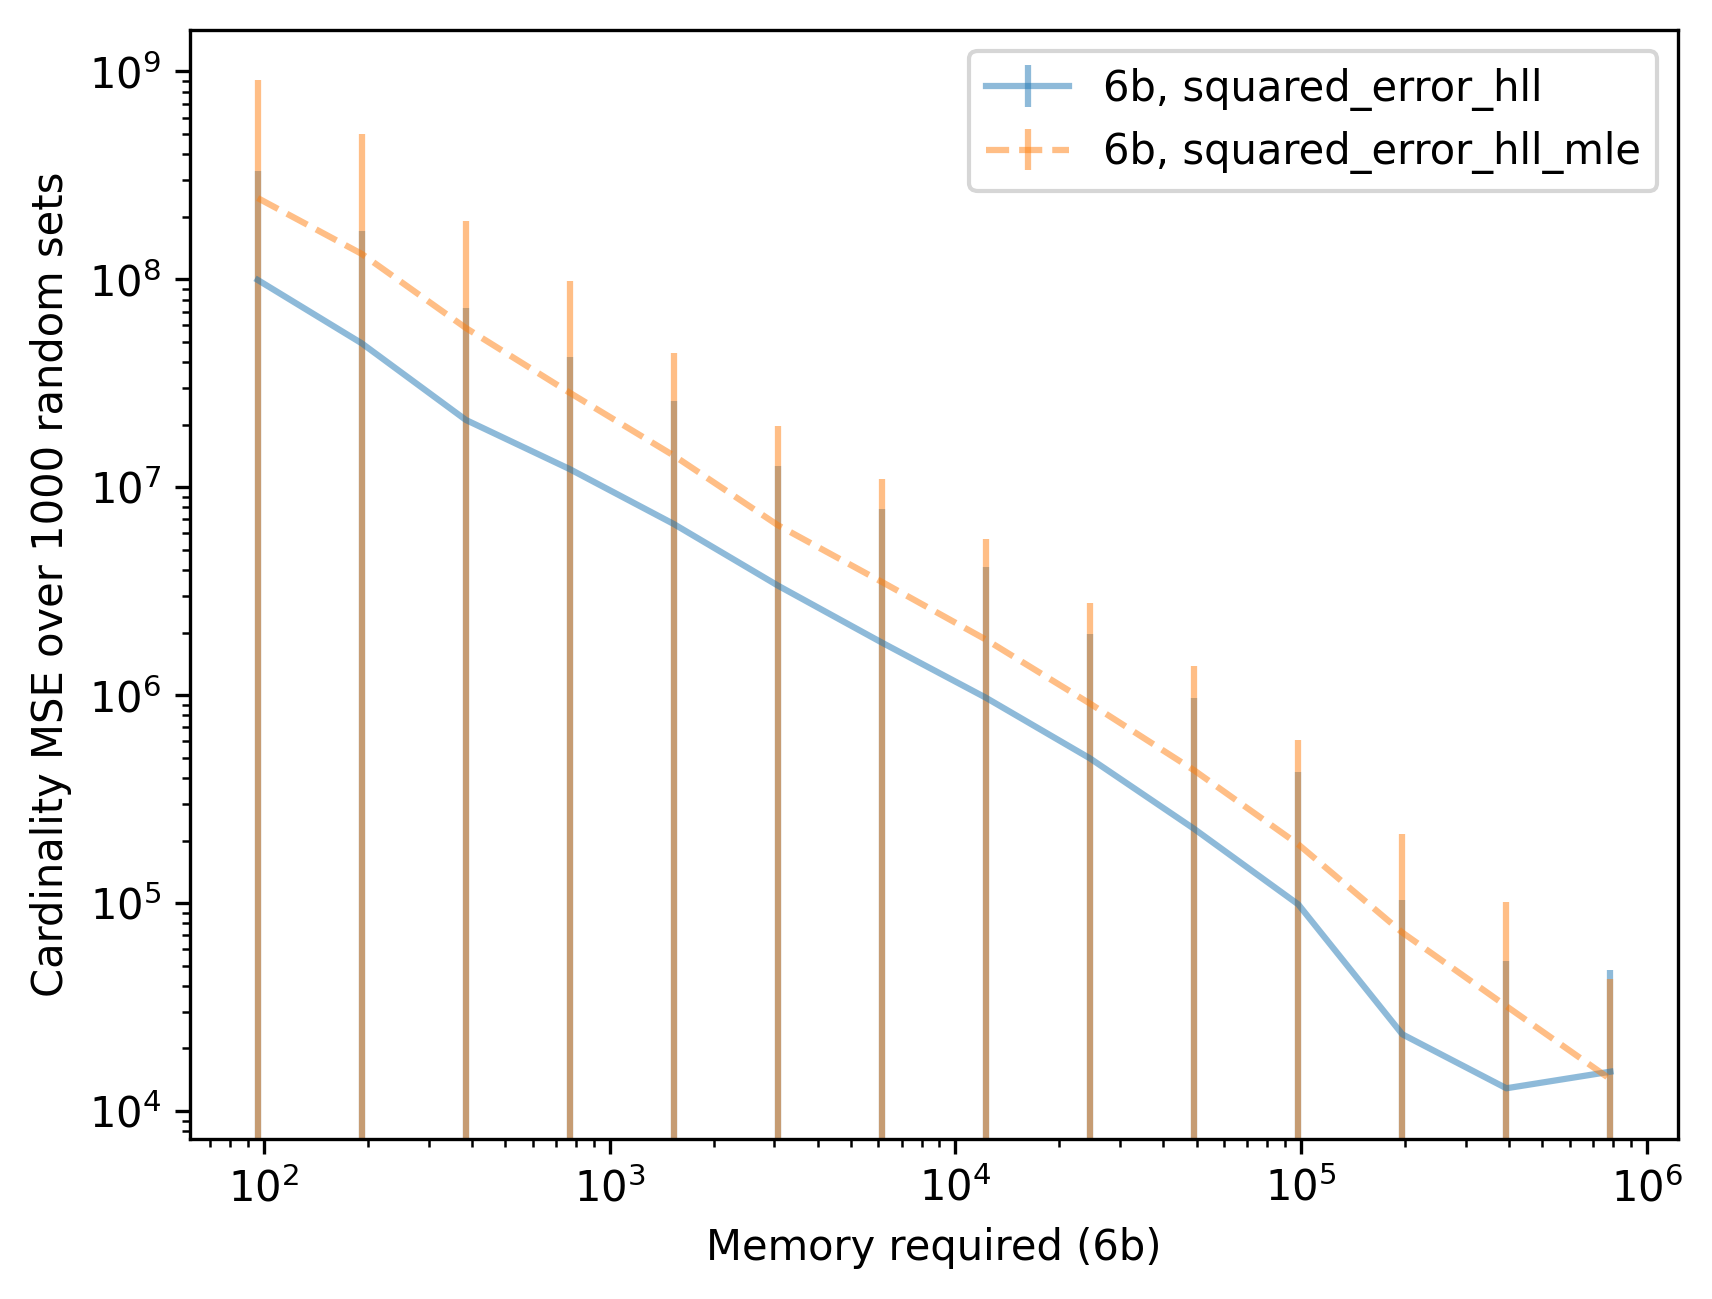

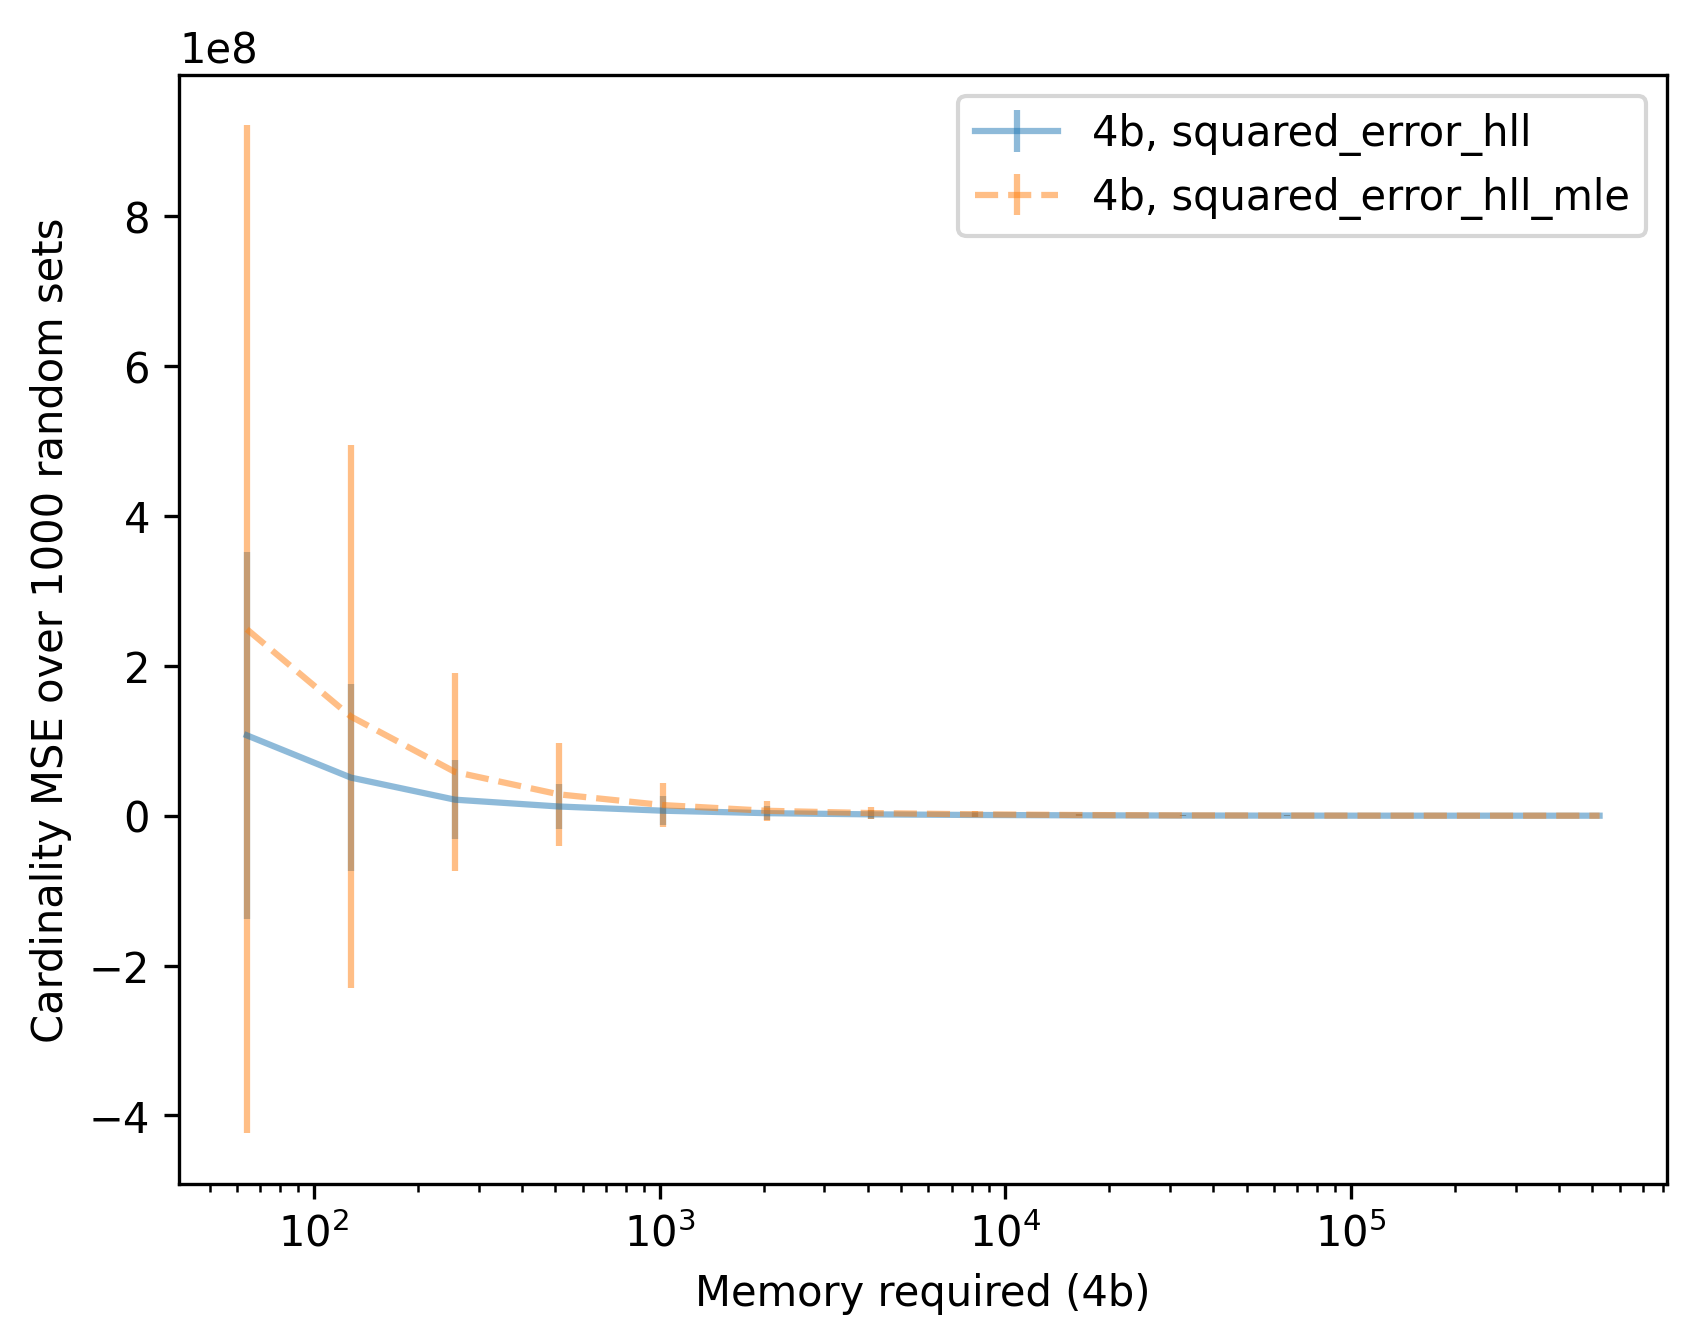

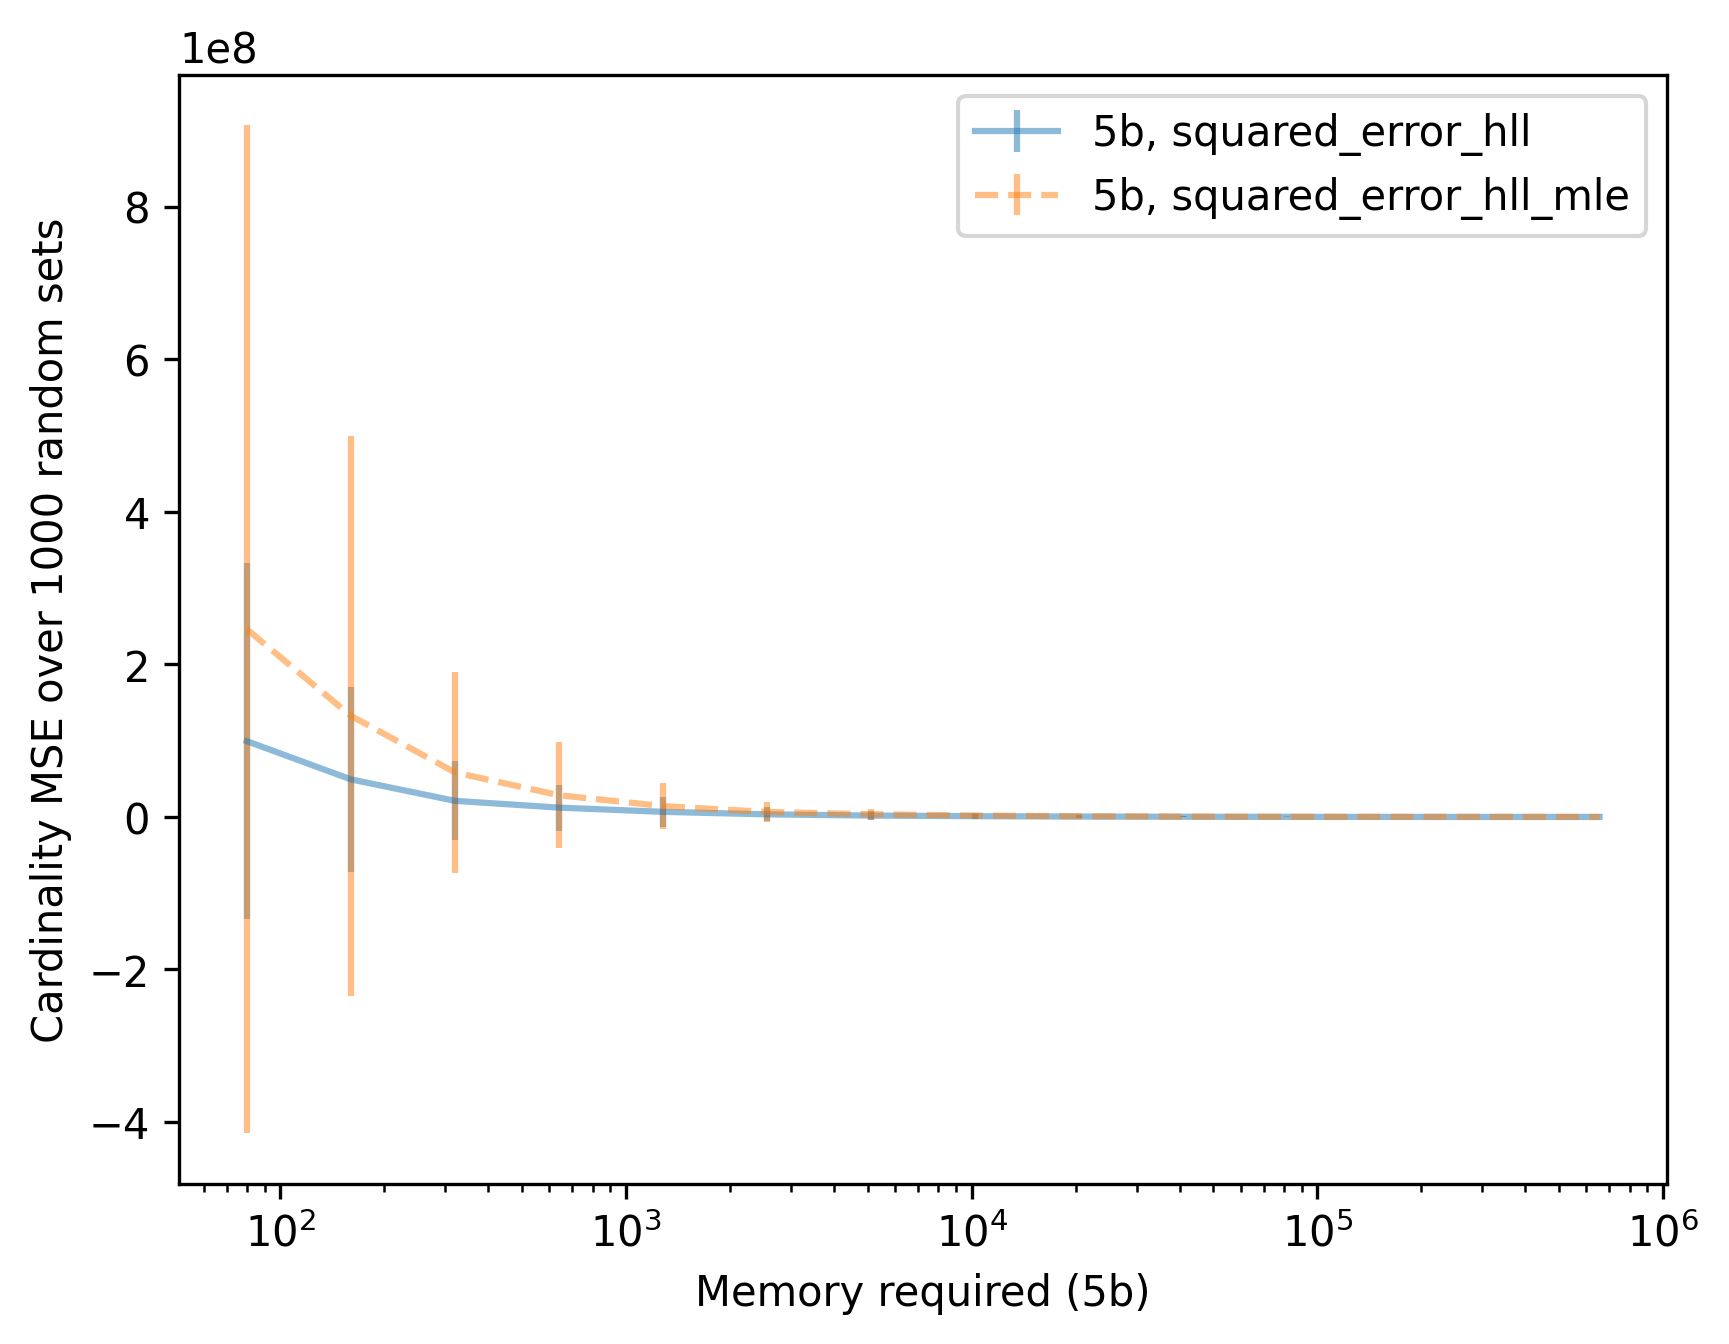

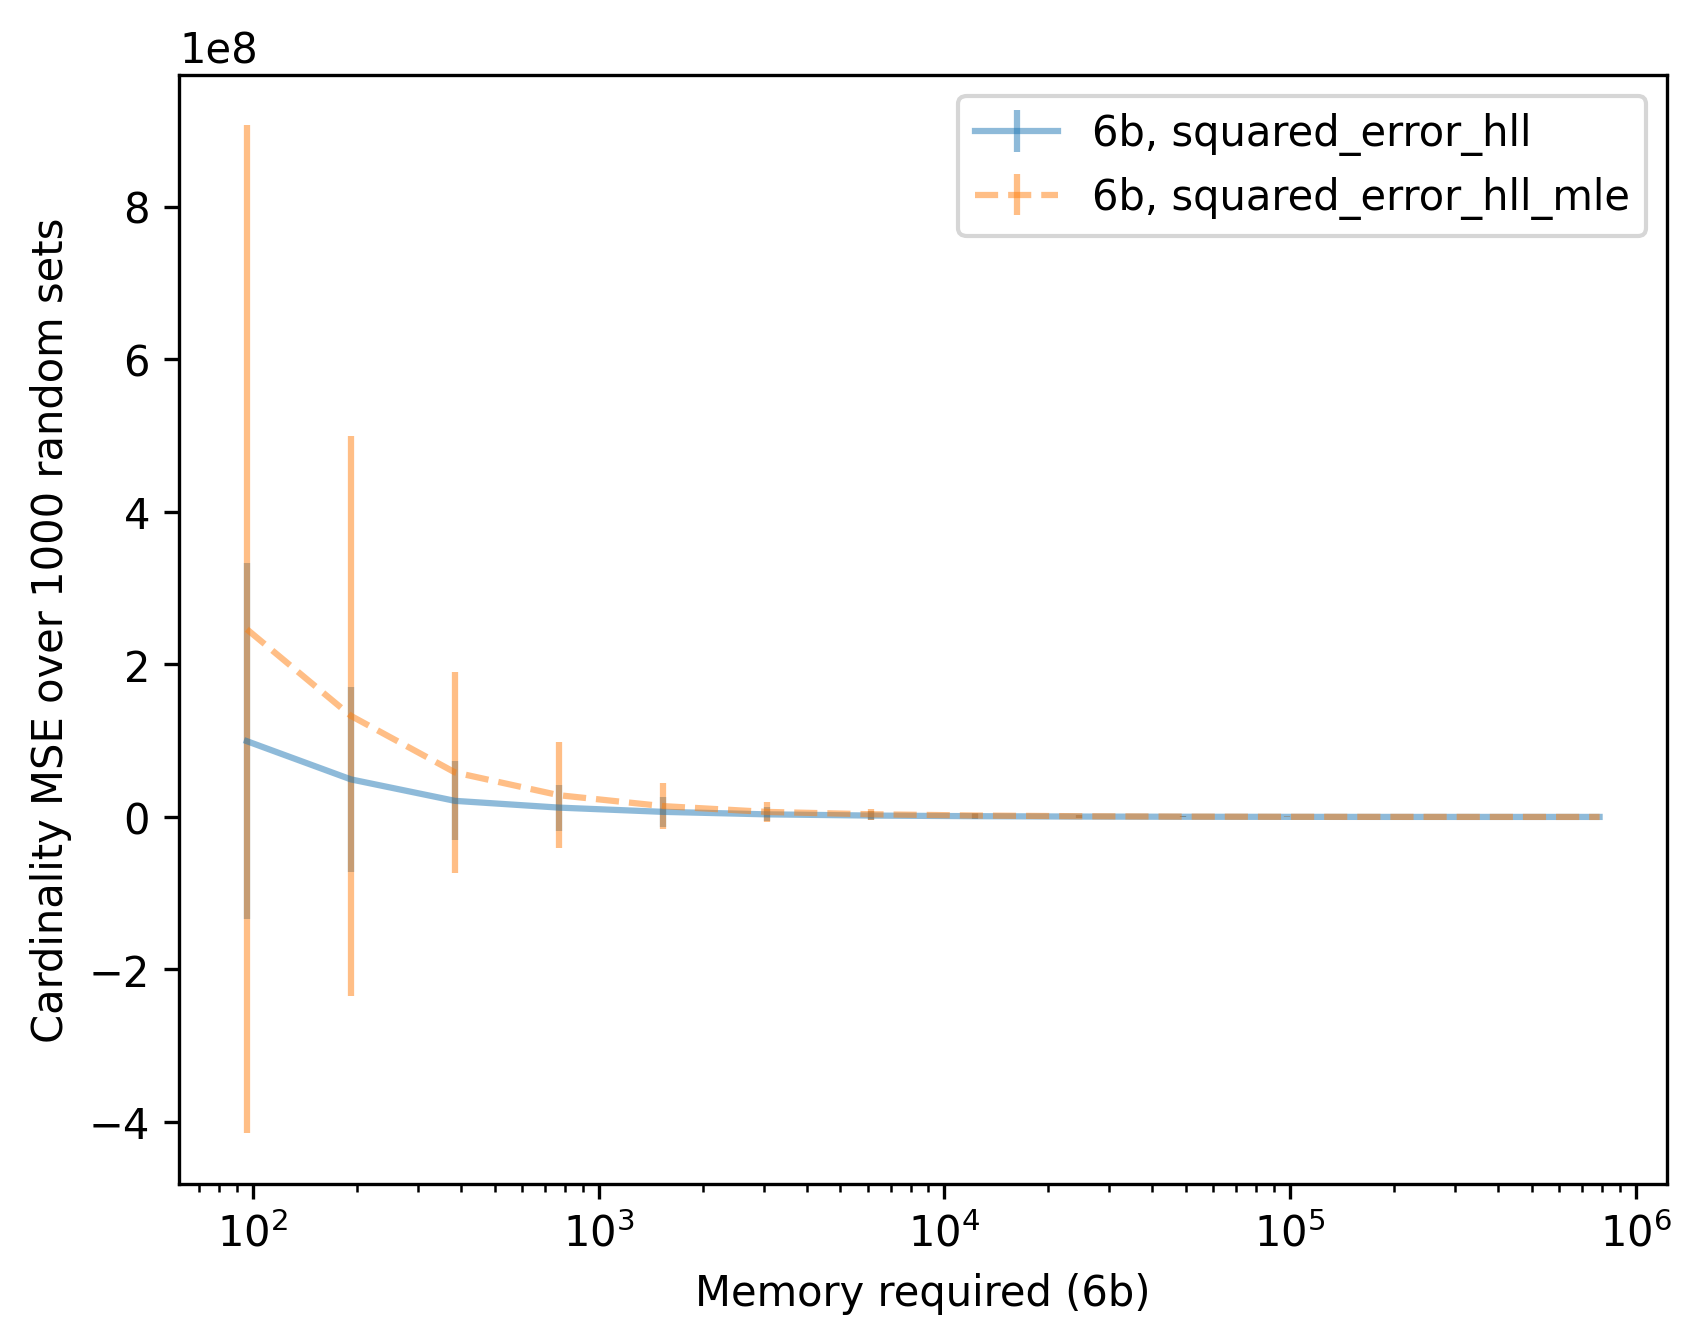

In [25]:
import matplotlib.pyplot as plt

bits_to_skip = (1, 2, 3,)


for scale in ("log", "linear"):
    for bits in data_hll["bits"].unique():
        fig, axes = plt.subplots(dpi=300)
        for column in columns:
            #for hash_name in data_hll["hash_name"].unique():
            if bits in bits_to_skip:
                continue
            filtered = data_hll[data_hll.bits == bits]
            linestyle = "-" if column == "squared_error_hll" else "--"
            #filtered = filtered[filtered.hash_name == hash_name]
            #short_hash_name = "Double" if "Double" in hash_name else "Plain"
            plt.errorbar(
                filtered.memory,
                filtered[column]["mean"],
                filtered[column]["std"],
                linestyle=linestyle,
                #marker=hash_name_marker_style[short_hash_name],
                label=f"{bits}b, {column}",
                alpha=0.5
            )

        plt.legend()
        plt.xscale("log")
        plt.yscale(scale)
        plt.ylabel("Cardinality MSE over 1000 random sets")
        plt.xlabel(f"Memory required ({bits}b)")
        plt.show()